# Task 5: Exploratory Data Analysis (EDA) on the Titanic Dataset

**Objective:** The goal of this project is to perform an exploratory data analysis on the Titanic dataset. We will use Python libraries like Pandas, Matplotlib, and Seaborn to uncover patterns, identify trends, and summarize the main characteristics of the data. This analysis will help us understand the factors that influenced passenger survival.


### 1. Loading and Inspecting the Data

First, we'll load the `train.csv` dataset into a pandas DataFrame.


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv('train.csv')


In [19]:
# Inspect the data
print("--- Initial Data Head ---")
print(df.head())
print("\n" + "="*50 + "\n")

print("--- Data Info ---")
df.info()
print("\n" + "="*50 + "\n")

print("--- Missing Values ---")
print(df.isnull().sum())


--- Initial Data Head ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

### 2. Data Cleaning
Our inspection showed that `Age`, `Cabin`, and `Embarked` have missing values. We will clean them by:
- Filling `Age` with the median value.
- Filling `Embarked` with the most common value (mode).
- Dropping the `Cabin` column because too much data is missing.


In [20]:
# Clean the data
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop('Cabin', axis=1, inplace=True)

# Verify that cleaning is complete
print("--- Missing Values After Cleaning ---")
print(df.isnull().sum())


--- Missing Values After Cleaning ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


/tmp/ipython-input-2339993975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2339993975.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### 3. Data Visualization and Analysis
Now we will create plots to find trends in the data.


#### Overall Survival Rate
This chart shows that more passengers did not survive (0) than those who did (1).


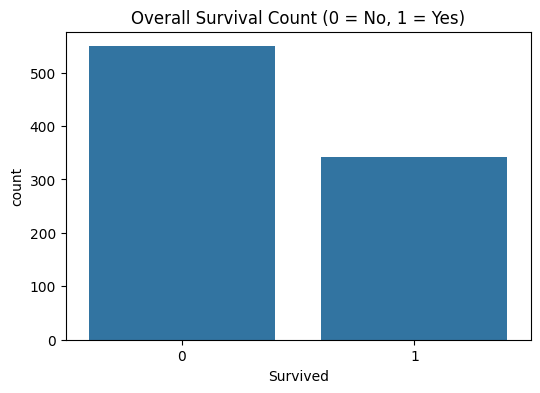

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Count (0 = No, 1 = Yes)')
plt.show()


#### Survival Rate by Gender
Female passengers had a much higher survival rate than male passengers.


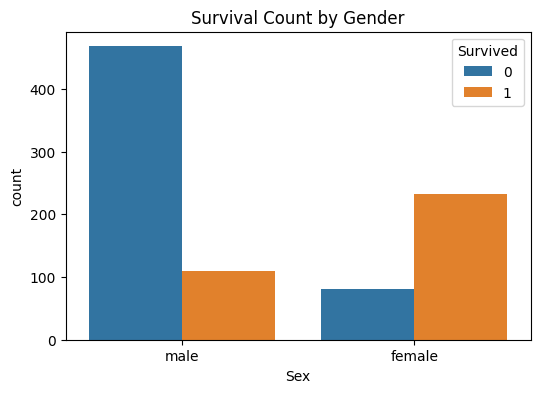

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


#### Survival Rate by Passenger Class (Pclass)
1st class passengers had the highest survival rate, and 3rd class had the lowest.


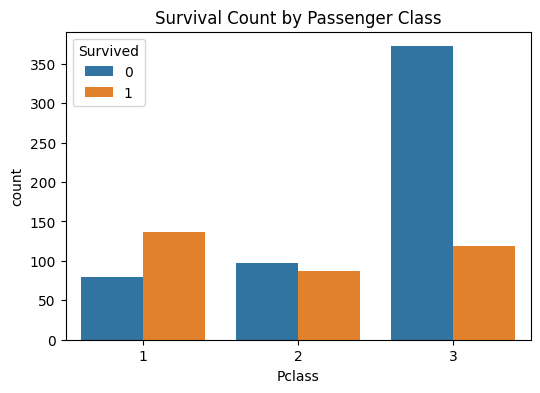

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


#### Age Distribution of Passengers
Most passengers were young adults between 20 and 40 years old.


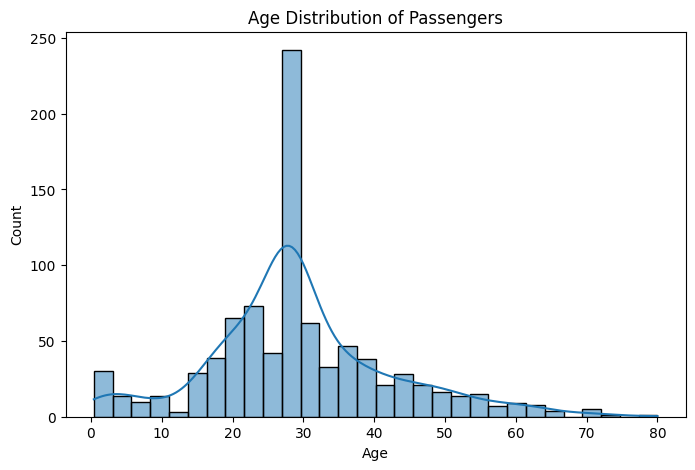

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


#### Correlation Between Numerical Features
This heatmap shows how different features are related. `Pclass` has a strong negative correlation with survival, while `Fare` has a positive one.


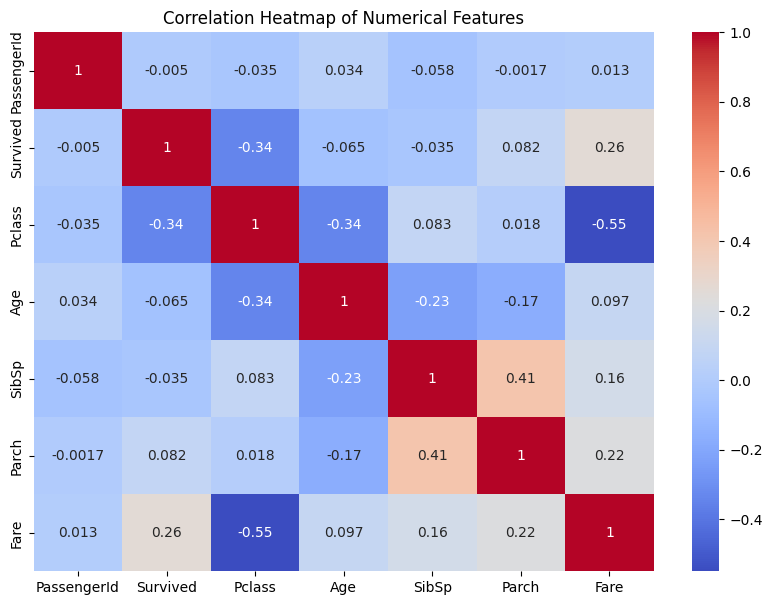

In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### 4. Summary of Findings
- A passenger's chance of survival was influenced by their gender, age, and class.
- Passengers in 1st class had a much higher survival rate.
- Female passengers were far more likely to survive than males.
